In [1]:
# https://www.youtube.com/watch?v=J1jhfAw5Uvo

In [2]:
pip install tensorflow

     -------------------------------------- 300.8/300.8 MB 3.7 MB/s eta 0:00:00
     -------------------------------------- 938.4/938.4 kB 6.6 MB/s eta 0:00:00
     -------------------------------------- 130.2/130.2 kB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 7.8 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 5.5 MB/s eta 0:00:00
     -------------------------------------- 442.0/442.0 kB 6.9 MB/s eta 0:00:00
     ---------------------------------------- 15.8/15.8 MB 5.8 MB/s eta 0:00:00
     -------------------------------------- 413.4/413.4 kB 8.8 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 8.6 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 5.9 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\DELL\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

C:\Users\DELL\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
X_train = np.loadtxt('input.csv', delimiter = ',')
# Data imort  form local computer  

In [3]:
Y_train = np.loadtxt('labels.csv', delimiter = ',')   
X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [4]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


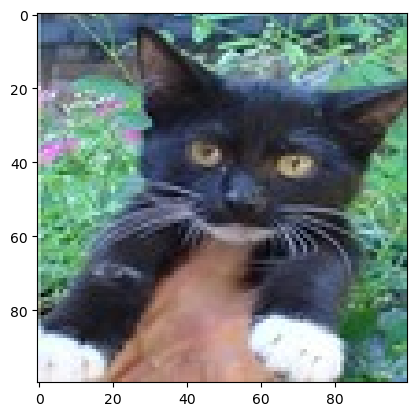

In [6]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx])
plt.show()

In [7]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [8]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [9]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5


32/32 [==============================] - 7s 114ms/step - loss: 0.7199 - accuracy: 0.5400
Epoch 2/5
32/32 [==============================] - 3s 97ms/step - loss: 0.6754 - accuracy: 0.5900
Epoch 3/5
32/32 [==============================] - 3s 97ms/step - loss: 0.6367 - accuracy: 0.6585
Epoch 4/5
32/32 [==============================] - 3s 97ms/step - loss: 0.5822 - accuracy: 0.6970
Epoch 5/5
32/32 [==============================] - 3s 97ms/step - loss: 0.5222 - accuracy: 0.7490


In [10]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 16ms/step - loss: 0.6347 - accuracy: 0.6500


[0.6346680521965027, 0.6499999761581421]

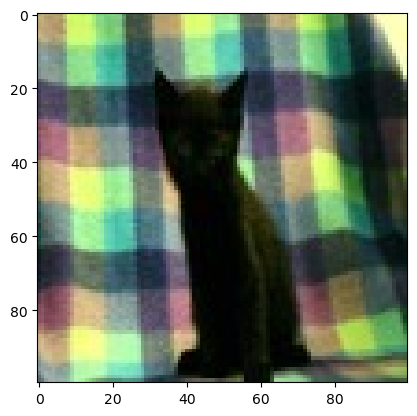

1/1 [==============================] - 0s 28ms/step
Our model says it is a : cat


In [14]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)